# Erzeugen von Zufallszahlen

## Normalverteilte Zufallszahlen

In [1]:
import numpy

In [18]:
numpy.random.seed( 42 )

In [20]:
numpy.random.normal( loc=0.0, scale=1.0 )

-0.13826430117118466

In [35]:
A = numpy.random.normal( loc=3, scale=1.0, size=10000 )

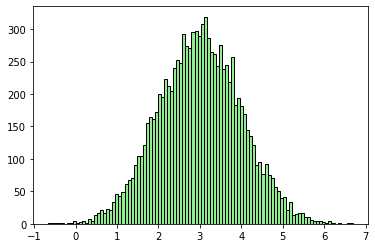

In [36]:
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

In [27]:
A.min()

-0.8563753292405969

In [28]:
A.max()

7.479084251025757

## Gleichverteilte Zufallszahlen

In [40]:
numpy.random.uniform(low=-10, high=+10)

-1.025294112742488

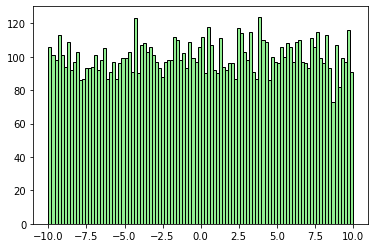

In [44]:
A = numpy.random.uniform( low=-10, high=+10, size=10000 )
import matplotlib.pyplot as plt
plt.hist(A, bins=100, color="lightgreen", edgecolor="black")
plt.show()

# Simulation eines Abstandssensors mit linearer Kennlinie

In [169]:
import numpy

class abstandssensor_lineare_kennlinie:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = abstand + numpy.random.normal(
                      loc=self.bias,
                      scale=self.noise)
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"

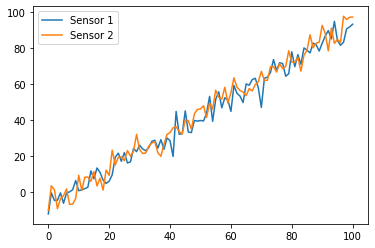

In [160]:
s1 = abstandssensor_lineare_kennlinie()
s2 = abstandssensor_lineare_kennlinie()

a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.legend()
plt.show()

In [90]:
s1.noise, s2.noise

(1.7428240269946773, 4.143907897801963)

# Fehlerfunktion für Fusionsergebnisse

In [91]:
gw = numpy.array([1,2,3,4,5])
sensorwerte = numpy.array([0.5, 2.5, 2.5, 4.5, 5.5])
numpy.mean(abs(gw-sensorwerte)) # MAE = Mean Absolute Error

In [96]:
def MAE(gw, sensorwerte):
    MAE = numpy.mean(abs(gw-sensorwerte))
    return numpy.around(MAE,2)

In [97]:
MAE(gw, sensorwerte)

0.5

# Erster Versuch eines Fusionsansatzes (Mittelwertbildung)

## Fehler bei Verwendung nur eines Sensors

In [121]:
a1,sw1 = s1.gib_mir_kennlinien_daten()

In [122]:
a1[:5]

array([0, 1, 2, 3, 4])

In [123]:
sw1[:5]

array([ 7.62130577,  7.88439755,  7.18659731,  8.23011172, 11.59222379])

In [124]:
MAE(a1,sw1)

7.71

In [125]:
a2,sw2 = s2.gib_mir_kennlinien_daten()
MAE(a,sw)

6.93

## Sensordatenfusion über einfache Mittelwertbildung

In [127]:
sw1[:5]

array([ 7.62130577,  7.88439755,  7.18659731,  8.23011172, 11.59222379])

In [128]:
sw2[:5]

array([ 8.17286448,  7.53167863, 10.16964743,  8.46029575, 10.75598883])

In [129]:
sw_fusioniert = (sw1+sw2) / 2
sw_fusioniert[:5]

array([ 7.89708513,  7.70803809,  8.67812237,  8.34520374, 11.17410631])

In [132]:
MAE(a1, sw_fusioniert)

7.29

In [156]:
# 1. Erzeuge zwei Abstandssensoren
s1 = abstandssensor_lineare_kennlinie()
s2 = abstandssensor_lineare_kennlinie()

# 2. Bestimme experimentell die Biases
#    der beiden Sensoren
a1,sw1 = s1.gib_mir_kennlinien_daten()
bias1 = numpy.mean(a1 - sw1)
a2,sw2 = s2.gib_mir_kennlinien_daten()
bias2 = numpy.mean(a2 - sw2)

# 3. Simuliere Anwendung
a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
sw1 = sw1 + bias1
sw2 = sw2 + bias2
sw_fusioniert = (sw1+sw2) / 2

# 4. Berechne Mittleren Schätzfehler
print("Mittlerer Schätzfehler S1:", MAE(a1,sw1))
print("Mittlerer Schätzfehler S2:", MAE(a2,sw2))
print("Mittlerer Schätzfehler Fusioniert:", MAE(a1,sw_fusioniert))
print("Biase:", s1.bias, s2.bias) 

Mittlerer Schätzfehler S1: 0.87
Mittlerer Schätzfehler S2: 2.87
Mittlerer Schätzfehler Fusioniert: 1.58
Biase: 1.5304498955837627 6.9680934464784094


In [154]:
s1.bias, bias1

(-2.8003285715272375, 3.3114793731998864)

In [153]:
s2.noise

3.131161901932696

# Experiment: Immer mehr Sensoren

In [193]:
def exp(ANZ_SENSOREN, zeige_details=False):

    # 1. Erzeugen der gewünschten Anzahl von Sensoren
    alle_sensoren = []
    for sid in range(ANZ_SENSOREN):
        s = abstandssensor_lineare_kennlinie()
        alle_sensoren.append( s )

    # 2. Für jeden Sensor experimentell den
    #    Biaskorrekturwert bestimmen
    alle_biase = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        a,sw = s.gib_mir_kennlinien_daten()
        bias = numpy.mean(a - sw)
        alle_biase.append( bias )

    # 3. Simuliere Messungen
    alle_sensorwerte = []
    gw = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        a,sw = s.gib_mir_kennlinien_daten()
        sw = sw + alle_biase[sid] # Biaskorrektur!
        alle_sensorwerte.append( sw )
        gw.append( a )
        if zeige_details:
            print(f"Fehler nur Sensor {sid}: {MAE(a,sw)}")

    # 4. Fusion
    N = len(alle_sensorwerte[0])
    summen = numpy.zeros(N)
    for sid in range(ANZ_SENSOREN):
        summen += alle_sensorwerte[sid]
    fusionierte_sensorwerte = summen / ANZ_SENSOREN
    mittlerer_schaetzfehler = MAE(gw[0], fusionierte_sensorwerte)
    if zeige_details:
        print(f"Fehler bei Fusion mit {ANZ_SENSOREN}:" +
              f"{mittlerer_schaetzfehler}")
    
    return mittlerer_schaetzfehler

In [194]:
exp(3)

1.31

In [42]:
def meta_experiment():
    alle_schaetzfehler = []
    sensoranzahlen = []
    for ANZ_SENSOREN in range(1,21):
        schaetzfehler = exp(ANZ_SENSOREN)
        alle_schaetzfehler.append( schaetzfehler )
        sensoranzahlen.append( ANZ_SENSOREN )

    plt.bar( sensoranzahlen, alle_schaetzfehler )
    plt.xticks( sensoranzahlen )
    plt.xlabel("Anzahl der verwendeten Sensoren")
    plt.ylabel("Mittlerer Schätzfehler / MAE [cm]")
    plt.title("Fusionsergebnisse bei verschiedener Anzahl\n" + 
              " von Sensoren")
    plt.show()

In [198]:
sensoranzahlen

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Simulation eines Abstandssensors mit nicht-linearer Kennlinie

## Quizaufgabe

Nehmen Sie die alte Sensorklasse und simulieren Sie einen Sensor mit einer nicht-linearen Kennlinie!

In [6]:
import numpy
import matplotlib.pyplot as plt

class abstandssensor_nichtlineare_kennlinie:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = numpy.log(1+abstand)*10 + numpy.random.normal(
                      loc=self.bias,
                      scale=self.noise) 
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"

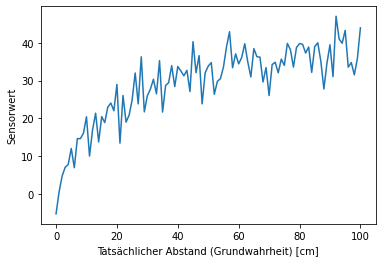

In [7]:
s1 = abstandssensor_nichtlineare_kennlinie()
s1.zeige_sensor_kennlinie()

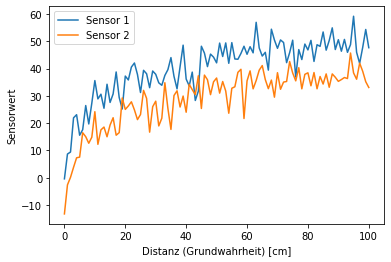

In [8]:
s1 = abstandssensor_nichtlineare_kennlinie()
s2 = abstandssensor_nichtlineare_kennlinie()

a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.xlabel("Distanz (Grundwahrheit) [cm]")
plt.ylabel("Sensorwert")
plt.legend()
plt.show()

## Experimentelle Bestimmung eines Inversen Sensormodells (ISM)

In [220]:
ism_s1 = {}

for abstand in range(0,101):
    
    sensorwerte = []
    for run in range(0,50):
        sw = s1.gib_mir_sensorwert(abstand)
        sensorwerte.append(sw)
    
    mittlerer_sensorwert = numpy.mean(sensorwerte)
    ism_s1[mittlerer_sensorwert] = abstand

In [221]:
type(ism_s1)

dict

In [222]:
ism_s1

{-4.19284212983791: 0,
 1.4287289805835883: 1,
 6.691635836238171: 2,
 9.217775987076374: 3,
 12.109469637642746: 4,
 13.465887806592315: 5,
 14.856519789012268: 6,
 16.325723900696243: 7,
 18.013669495421894: 8,
 18.80134469877211: 9,
 19.958631227005966: 10,
 20.60300770811546: 11,
 21.56273770308154: 12,
 21.574377912000124: 13,
 22.505562979389296: 14,
 23.31942911510581: 15,
 23.639875716149017: 16,
 24.296183473556574: 17,
 24.818568369401348: 18,
 25.4197921415263: 19,
 25.86127482252474: 20,
 26.728802746040095: 21,
 27.616553348068013: 22,
 28.08971459905034: 23,
 28.200600134155287: 24,
 27.316500846016588: 25,
 28.230311125850832: 26,
 29.129757926209564: 27,
 28.87115744613619: 28,
 29.805987872411652: 29,
 29.951801146457484: 30,
 29.891177978078574: 31,
 30.780224339335135: 32,
 30.869122493073515: 33,
 31.159625279860332: 34,
 31.52148874145092: 35,
 31.887747206837844: 36,
 31.98554479842669: 37,
 31.47032886593014: 38,
 32.184054269483966: 39,
 32.650044935145345: 40,


In [2]:
d = {"A": 12, "B": 4839, "C" : 943}
for key in d:
    print(key)

A
B
C


## Eine ISM Hilfsklasse

In [3]:
class ism:
    
    def __init__(self, s):
        self.sensor = s
        self.baue_lut_auf()
        
    def baue_lut_auf(self):
        self.lut = {}

        for abstand in range(0,101):

            sensorwerte = []
            for run in range(0,50):
                sw = self.sensor.gib_mir_sensorwert(abstand)
                sensorwerte.append(sw)

            mittlerer_sensorwert = numpy.mean(sensorwerte)
            self.lut[mittlerer_sensorwert] = abstand
            
    def sensorwert_zu_abstand(self, sensorwert):
        min_dist = None
        best_key = None
        for key in self.lut:
            dist = abs(sensorwert - key)
            if best_key == None or dist<min_dist:
                best_key = key
                min_dist = dist
        
        beste_entfernungs_schaetzung = self.lut[best_key]
        return beste_entfernungs_schaetzung

In [14]:
ism_s1 = ism(s1)
ism_s2 = ism(s2)

In [22]:
ism_s1.sensorwert_zu_abstand(20)

4

In [21]:
ism_s2.sensorwert_zu_abstand(20)

15

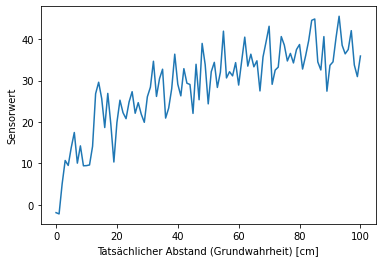

In [20]:
s2.zeige_sensor_kennlinie()

## Sensordatenfusion über Inverse Sensor Modelle

In [36]:
def MAE(gw, sensorwerte):
    MAE = numpy.mean(abs(gw-sensorwerte))
    return numpy.around(MAE,2)


def exp(ANZ_SENSOREN, zeige_details=False):

    # 1. Erzeugen der gewünschten Anzahl von Sensoren
    alle_sensoren = []
    for sid in range(ANZ_SENSOREN):
        s = abstandssensor_nichtlineare_kennlinie()
        alle_sensoren.append( s )

    # 2. Für jeden Sensor experimentell
    #    ein ISM bestimmen
    alle_isms = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        ism_fuer_den_sensor = ism(s)
        alle_isms.append( ism_fuer_den_sensor )

    # 3. Simuliere Messungen
    alle_abstands_schaetzungen = []
    gw = []
    for sid in range(ANZ_SENSOREN):
        s = alle_sensoren[sid]
        a,sw = s.gib_mir_kennlinien_daten()
        ism_fuer_den_sensor = alle_isms[sid]
        abstands_schaetzungen = []
        for sensorwert in sw:
            abstands_schaetzung = ism_fuer_den_sensor.sensorwert_zu_abstand(sensorwert)
            abstands_schaetzungen.append( abstands_schaetzung )
        alle_abstands_schaetzungen.append( abstands_schaetzungen ) 
        gw.append(a)
            
    # 4. Fusion
    N = len(alle_abstands_schaetzungen[0])
    summen = numpy.zeros(N)
    for sid in range(ANZ_SENSOREN):
        summen += alle_abstands_schaetzungen[sid]
    
    fusionierte_abstaende = summen / ANZ_SENSOREN
    mittlerer_schaetzfehler = MAE(gw[0], fusionierte_abstaende)
    if zeige_details:
        print(f"Fehler bei Fusion mit {ANZ_SENSOREN}:" +
              f"{mittlerer_schaetzfehler}")
    
    return mittlerer_schaetzfehler

In [41]:
exp(3)

4.1

In [35]:
numpy.array([1,1,1]) + [2,2,2] + [3,3,3]

array([6, 6, 6])

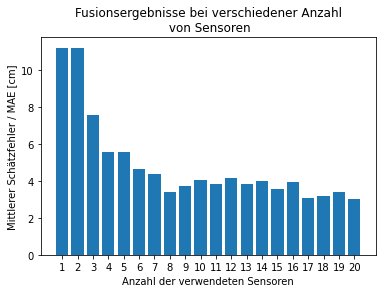

In [43]:
meta_experiment()

# Simulation eines echt fiesen Abstandssensors

## Neue Sensorklasse

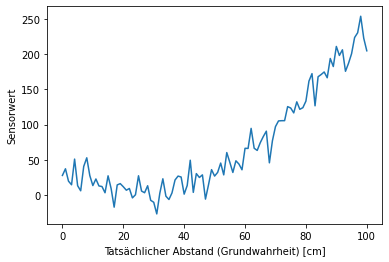

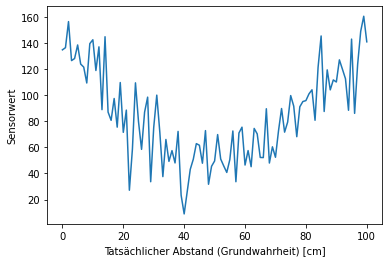

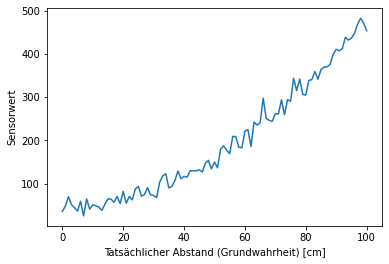

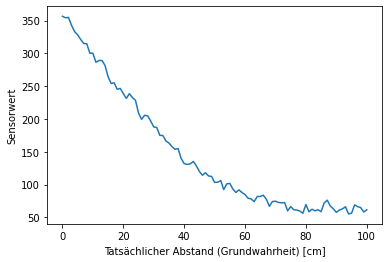

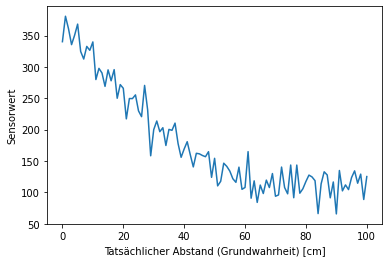

In [69]:
import numpy
import matplotlib.pyplot as plt

class abstandssensor_seltsam:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        self.pos = numpy.random.uniform(low=1, high=100)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = abstand + \
                     5*numpy.sin(abstand/10) + \
                     4*numpy.random.normal(loc=self.bias, scale=self.noise) + \
                     ((abstand-self.pos)/5)**2
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"
    
for sid in range(5):
    s = abstandssensor_seltsam()
    s.zeige_sensor_kennlinie()

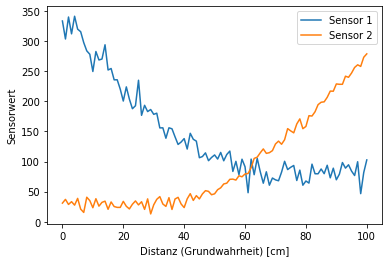

In [71]:
s1 = abstandssensor_seltsam()
s2 = abstandssensor_seltsam()

a1,sw1 = s1.gib_mir_kennlinien_daten()
a2,sw2 = s2.gib_mir_kennlinien_daten()
plt.plot(a1,sw1, label="Sensor 1")
plt.plot(a2,sw2, label="Sensor 2")
plt.xlabel("Distanz (Grundwahrheit) [cm]")
plt.ylabel("Sensorwert")
plt.legend()
plt.show()

## Erzeugung von Beispieldaten

In [152]:
N = 1000
X = numpy.zeros((N,2))
Y = numpy.zeros((N,1))

for i in range(0,N):
    abstand = numpy.random.uniform(low=0, high=100)
    sw1 = s1.gib_mir_sensorwert(abstand)
    sw2 = s2.gib_mir_sensorwert(abstand)
    
    X[i,0] = sw1
    X[i,1] = sw2
    Y[i,0] = abstand

In [123]:
X[:10]

array([[321.98992696,  26.95251605],
       [313.70757112,  37.2079568 ],
       [320.31081366,  30.47773848],
       [315.00007985,  40.71765205],
       [310.55920918,  32.09917189],
       [290.72076178,  22.47821137],
       [278.93518973,  33.61409992],
       [282.10664966,  23.94471168],
       [287.28794516,  24.18270348],
       [282.81432222,  30.38447296]])

In [124]:
Y[:10]

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

## Train-/Test-Split

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=123)

In [154]:
X_train.shape

(800, 2)

In [155]:
X.shape

(1000, 2)

In [156]:
X_train[0]

array([287.04685462,  43.7262653 ])

In [157]:
Y_train.shape

(800, 1)

In [158]:
X_test.shape

(200, 2)

In [159]:
Y_test.shape

(200, 1)

In [151]:
print(X_train[0], "-->", Y_train[0])

[165.05159598  15.18385221] --> [35.]


In [133]:
print(X_test[0], "-->", Y_test[0])

[ 57.77453894 185.7375035 ] --> [83.]


## Machine Learning zur Sensordatenfusion

In [160]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model = model.fit(X_train, Y_train)

In [161]:
model.predict( [[300.43,  30.48475232]] )

array([[5.70364268]])

## Modellgüte bestimmen

In [162]:
preds = model.predict( X_test )

In [163]:
X_test.shape

(200, 2)

In [164]:
Y_test.shape

(200, 1)

In [165]:
preds.shape

(200, 1)

In [166]:
print(X_test[0], "--model-->", preds[0], "vs.", Y_test[0] )

[108.51145345  50.32731881] --model--> [47.8727406] vs. [50.76090953]


In [167]:
preds

array([[47.8727406 ],
       [80.51811339],
       [32.43820852],
       [65.48857286],
       [67.75505501],
       [44.10388589],
       [79.18643045],
       [ 4.45930126],
       [48.89936497],
       [89.71488143],
       [ 5.0232389 ],
       [41.79674026],
       [72.91598343],
       [ 2.03738427],
       [99.34638318],
       [72.79233487],
       [49.23194239],
       [40.30609549],
       [12.63250301],
       [27.97290014],
       [66.30498182],
       [47.60118585],
       [88.30433838],
       [33.01791236],
       [80.91461759],
       [71.5651886 ],
       [36.4793148 ],
       [97.57680913],
       [27.08493969],
       [16.461556  ],
       [69.6759172 ],
       [34.62196853],
       [45.65546544],
       [82.32106976],
       [52.03486127],
       [20.09365887],
       [32.31560921],
       [51.79919366],
       [60.43120907],
       [32.51033081],
       [98.00884918],
       [91.88799222],
       [81.31886117],
       [92.427925  ],
       [20.08937259],
       [83

In [168]:
Y_test

array([[50.76090953],
       [80.2743394 ],
       [35.72705092],
       [66.10267983],
       [67.80061532],
       [43.04905197],
       [76.84084342],
       [ 4.22344891],
       [48.94564148],
       [90.91353379],
       [ 7.21997711],
       [37.82439333],
       [69.28066414],
       [ 4.5530705 ],
       [99.9805916 ],
       [74.22451194],
       [43.53846791],
       [37.85695504],
       [10.58120461],
       [29.65771771],
       [66.2228794 ],
       [45.25477114],
       [88.87135433],
       [28.01814375],
       [79.54819579],
       [69.52381547],
       [39.23323864],
       [97.59999991],
       [28.41306212],
       [13.40743588],
       [71.170688  ],
       [29.01910532],
       [45.83420479],
       [81.34981577],
       [50.03018658],
       [15.45346927],
       [36.32418647],
       [53.01464362],
       [60.98210804],
       [31.25079934],
       [97.11459897],
       [92.25107482],
       [82.58748775],
       [91.53889416],
       [20.89974506],
       [84

In [169]:
numpy.mean(abs(preds - Y_test).flatten())

1.9055584521826259

# Sensordatenfusion über ML mit mehreren Sensoren

## Alles in einer Codezelle

MAE(2 Sensoren) = 1.69
MAE(3 Sensoren) = 1.28
MAE(4 Sensoren) = 1.19
MAE(5 Sensoren) = 1.20
MAE(6 Sensoren) = 1.19
MAE(7 Sensoren) = 0.79
MAE(8 Sensoren) = 0.82
MAE(9 Sensoren) = 0.85
MAE(10 Sensoren) = 0.82


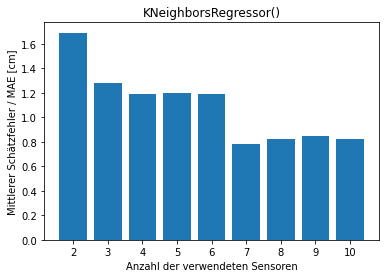

MAE(2 Sensoren) = 2.19
MAE(3 Sensoren) = 1.67
MAE(4 Sensoren) = 1.57
MAE(5 Sensoren) = 1.56
MAE(6 Sensoren) = 1.52
MAE(7 Sensoren) = 0.97
MAE(8 Sensoren) = 0.97
MAE(9 Sensoren) = 0.97
MAE(10 Sensoren) = 0.94


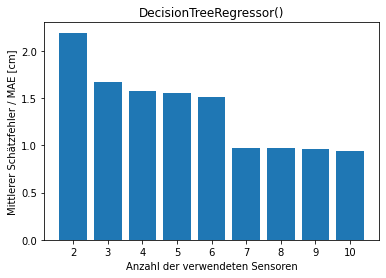

MAE(2 Sensoren) = 1.67
MAE(3 Sensoren) = 1.23
MAE(4 Sensoren) = 1.13
MAE(5 Sensoren) = 1.12
MAE(6 Sensoren) = 1.08
MAE(7 Sensoren) = 0.69
MAE(8 Sensoren) = 0.68
MAE(9 Sensoren) = 0.68
MAE(10 Sensoren) = 0.65


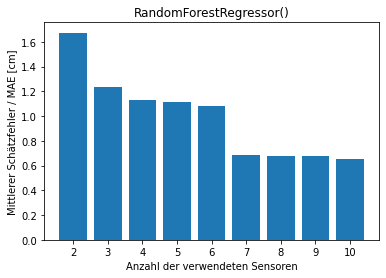

In [57]:
import numpy
import matplotlib.pyplot as plt

class abstandssensor_seltsam:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        self.pos = numpy.random.uniform(low=1, high=100)
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = abstand + \
                     5*numpy.sin(abstand/10) + \
                     4*numpy.random.normal(loc=self.bias, scale=self.noise) + \
                     ((abstand-self.pos)/5)**2
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"
    
# 1. Erzeuge M Sensoren
M = 10
sensors = []
for sensor_nr in range(M):
    s = abstandssensor_seltsam()
    sensors.append( s )
    
# 2. Beispieldaten fürs ML sammeln    
N = 100000
X = numpy.zeros((N,M))
Y = numpy.zeros((N,1))

for i in range(0,N):
    abstand = numpy.random.uniform(low=0, high=100)
    
    for sensor_nr in range(M):
        sw = sensors[sensor_nr].gib_mir_sensorwert(abstand)        
        X[i,sensor_nr] = sw
   
    Y[i,0] = abstand
    
# 3. Train-/Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=123)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor()
         ]

for model in models:
    
    sensoranzahlen = []
    alle_schaetzfehler = []
    for sensors_used in range(2,M+1):

        # 4. ML-Modell erstellen

        model = model.fit(X_train[0:N,0:sensors_used],
                          Y_train.flatten())

        # 5. Modellgüte bestimmen
        preds = model.predict( X_test[0:N,0:sensors_used] )
        current_MAE = numpy.mean(abs(preds - Y_test.flatten()).flatten())
        print( f"MAE({sensors_used} Sensoren) = {current_MAE:.2f}" )

        sensoranzahlen.append( sensors_used )
        alle_schaetzfehler.append( current_MAE )


    # 6. Ergebnisse als Balkendiagramm visualisieren
    plt.bar( sensoranzahlen, alle_schaetzfehler )
    plt.xticks( sensoranzahlen )
    plt.xlabel("Anzahl der verwendeten Sensoren")
    plt.ylabel("Mittlerer Schätzfehler / MAE [cm]")
    plt.title(model)
    plt.show()

In [32]:
Y_train.shape

(8000, 1)

In [51]:
Y_train[:5].flatten().shape

(5,)

In [50]:
Y_train[:5].ravel().shape

(5,)

# Normierung von Sensorwerten

## Mit Formel

In [1]:
import numpy as np

# Beispiel-Sensorwerte
sensor1_werte = np.array([100, 200, 300, 400, 500])
sensor2_werte = np.array([10, 20, 30, 40, 50])

def min_max_normierung(werte):
    min_wert = np.min(werte)
    max_wert = np.max(werte)
    normierte_werte = (werte - min_wert) / (max_wert - min_wert)
    return normierte_werte

# Normierung der Sensorwerte
sensor1_normiert = min_max_normierung(sensor1_werte)
sensor2_normiert = min_max_normierung(sensor2_werte)

# Ergebnisse ausgeben
print("Sensor 1 (normiert):", sensor1_normiert)
print("Sensor 2 (normiert):", sensor2_normiert)

Sensor 1 (normiert): [0.   0.25 0.5  0.75 1.  ]
Sensor 2 (normiert): [0.   0.25 0.5  0.75 1.  ]


## Mit scikit-learn

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Beispiel-Sensorwerte
sensor1_werte = np.array([100, 200, 300, 400, 500]).reshape(-1, 1)
sensor2_werte = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)

# Min-Max-Normierung
scaler = MinMaxScaler()
sensor1_normiert = scaler.fit_transform(sensor1_werte)
sensor2_normiert = scaler.fit_transform(sensor2_werte)

# Ergebnisse ausgeben
print("Sensor 1 (normiert):", sensor1_normiert.flatten())
print("Sensor 2 (normiert):", sensor2_normiert.flatten())


Sensor 1 (normiert): [0.   0.25 0.5  0.75 1.  ]
Sensor 2 (normiert): [0.   0.25 0.5  0.75 1.  ]


In [6]:
np.array([100, 200, 300, 400, 500]).reshape(-1,1)

2

# Neuer Sensor: Unterschiedliche Wertebereiche

In [40]:
import numpy
import matplotlib.pyplot as plt

class abstandssensor_seltsam2:
    
    def __init__(self):
        self.bias = numpy.random.uniform(low=-10, high=+10)
        self.noise = numpy.random.uniform(low=1, high=5)
        self.pos = numpy.random.uniform(low=1, high=100)
        self.fac = numpy.random.uniform(low=1, high=10)**2
        
    def gib_mir_sensorwert(self, abstand):
        sensorwert = self.fac * \
                     (abstand + \
                     5*numpy.sin(abstand/10) + \
                     4*numpy.random.normal(loc=self.bias, scale=self.noise) + \
                     ((abstand-self.pos)/5)**2
                     )
        return sensorwert
    
    def gib_mir_kennlinien_daten(self):
        abstaende   = []
        sensorwerte = []
        for abstand in range(0,101):
            sensorwert = self.gib_mir_sensorwert(abstand)
            abstaende.append( abstand)
            sensorwerte.append( sensorwert )
        return numpy.array(abstaende), \
               numpy.array(sensorwerte)
    
    def zeige_sensor_kennlinie(self):
        a,s = self.gib_mir_kennlinien_daten()
        plt.plot(a,s)
        plt.xlabel("Tatsächlicher Abstand (Grundwahrheit) [cm]")
        plt.ylabel("Sensorwert")
        plt.show()
        
    def __repr__(self):
        return f"Bias: {self.bias:.2f}, Noise: {self.noise:.2f}"

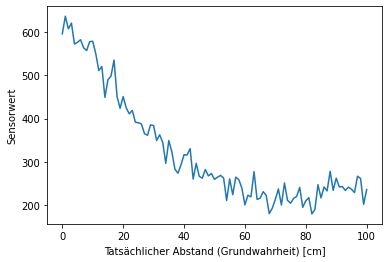

In [47]:
s1 = abstandssensor_seltsam2()
s1.zeige_sensor_kennlinie()

# k-NN Regressor mit Skalierung

In [84]:
# 1. Erzeuge M Sensoren
M = 10
sensors = []
for sensor_nr in range(M):
    s = abstandssensor_seltsam2()
    sensors.append( s )
    
# 2. Beispieldaten fürs ML sammeln    
N = 10000
X = numpy.zeros((N,M))
Y = numpy.zeros((N,1))

for i in range(0,N):
    abstand = numpy.random.uniform(low=0, high=100)
    
    for sensor_nr in range(M):
        sw = sensors[sensor_nr].gib_mir_sensorwert(abstand)        
        X[i,sensor_nr] = sw
   
    Y[i,0] = abstand
    
for run in range(10):
    
    for skaliere in [True, False]:

        if skaliere:
            # 3. Skalierung der Sensordaten
            from sklearn.preprocessing import MinMaxScaler
            X_scaled = scaler.fit_transform(X)
        else:
            X_scaled = X

        # 4. Train-/Test-Split
        from sklearn.model_selection import train_test_split
        X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
                                                            test_size=0.2)

        # 5. Modell trainieren
        from sklearn.neighbors import KNeighborsRegressor
        model = KNeighborsRegressor()
        model = model.fit(X_train,
                          Y_train.flatten())

        # 6. Modellgüte bestimmen
        preds = model.predict( X_test )
        current_MAE = numpy.mean(abs(preds - Y_test.flatten()).flatten())
        print( f"MAE({skaliere}) = {current_MAE:.2f}", end=" <-> " )
        
    print()

MAE(True) = 22.84 <-> MAE(False) = 22.42 <-> 
MAE(True) = 22.85 <-> MAE(False) = 22.55 <-> 
MAE(True) = 22.63 <-> MAE(False) = 22.93 <-> 
MAE(True) = 22.19 <-> MAE(False) = 22.39 <-> 
MAE(True) = 22.03 <-> MAE(False) = 22.64 <-> 
MAE(True) = 22.66 <-> MAE(False) = 22.24 <-> 
MAE(True) = 22.66 <-> MAE(False) = 22.50 <-> 
MAE(True) = 22.50 <-> MAE(False) = 22.32 <-> 
MAE(True) = 22.72 <-> MAE(False) = 23.41 <-> 
MAE(True) = 22.64 <-> MAE(False) = 22.78 <-> 
